# AI Assignment
Name: Ian Oatis

**Prompt:** Create code to import pandas, numpy, matplotlib, and seaborn. I have a file named card_transdata.csv, import this as a DatafFame using pandas and print the head, summary statistics, data info, and summary of null values. 

**AI:** ChatGPT-5 mini

### Load the Data

In [1]:
# Load libraries and show basic DataFrame summaries for card_transdata.csv

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter notebooks: uncomment if needed
# %matplotlib inline

sns.set(style="whitegrid")

csv_path = Path("card_transdata.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"Could not find '{csv_path}'. Ensure the CSV is in the same folder as the notebook.")

In [2]:
# Read CSV (low_memory=False helps reduce dtype inference warnings on mixed columns)
df = pd.read_csv(csv_path, low_memory=False)

print(f"Loaded: {csv_path.resolve()}")
print(f"Shape: {df.shape}\n")

# 1) Head
print("=== HEAD ===")
display(df.head())

Loaded: /Users/ianoatis/Desktop/Fall 2025/MAT 311 (Data Science)/AI Assignment/card_transdata.csv
Shape: (999, 8)

=== HEAD ===


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


In [3]:
# 2) Summary statistics (numeric)
print("\n=== SUMMARY STATISTICS (numeric columns) ===")
display(df.describe(include=[np.number]).T)


=== SUMMARY STATISTICS (numeric columns) ===


,count,mean,std,min,25%,50%,75%,max
distance_from_home,999.0,26.876607,63.899697,0.104184,3.990543,10.340321,25.393952,965.910612
distance_from_last_transaction,996.0,5.437319,35.668094,0.001448,0.306441,0.958539,3.137259,990.070315
ratio_to_median_purchase_price,997.0,1.655069,2.351386,0.016933,0.468123,0.955504,1.922025,36.074366
repeat_retailer,992.0,0.892137,0.310364,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,995.0,0.313568,0.464176,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,997.0,0.117352,0.322001,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,995.0,0.673367,0.469218,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,999.0,0.079079,0.269997,0.000000,0.000000,0.000000,0.000000,1.000000


In [4]:
# 3) Summary statistics (all columns)
print("\n=== SUMMARY STATISTICS (all columns) ===")
display(df.describe(include='all').T)


=== SUMMARY STATISTICS (all columns) ===


,count,mean,std,min,25%,50%,75%,max
distance_from_home,999.0,26.876607,63.899697,0.104184,3.990543,10.340321,25.393952,965.910612
distance_from_last_transaction,996.0,5.437319,35.668094,0.001448,0.306441,0.958539,3.137259,990.070315
ratio_to_median_purchase_price,997.0,1.655069,2.351386,0.016933,0.468123,0.955504,1.922025,36.074366
repeat_retailer,992.0,0.892137,0.310364,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,995.0,0.313568,0.464176,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,997.0,0.117352,0.322001,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,995.0,0.673367,0.469218,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,999.0,0.079079,0.269997,0.000000,0.000000,0.000000,0.000000,1.000000


In [5]:
# 4) DataFrame info (dtypes, non-null counts)
print("\n=== DATAFRAME INFO ===")
df.info()


=== DATAFRAME INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


### Data Wrangling

In [6]:
# 5) Null value summary (counts and percent)
print("\n=== NULL COUNTS PER COLUMN ===")
null_counts = df.isnull().sum()
display(null_counts)

print("\n=== PERCENT NULLS PER COLUMN ===")
null_percent = (df.isnull().mean() * 100).round(2)
display(null_percent)


=== NULL COUNTS PER COLUMN ===


distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


=== PERCENT NULLS PER COLUMN ===


distance_from_home                0.0
distance_from_last_transaction    0.3
ratio_to_median_purchase_price    0.2
repeat_retailer                   0.7
used_chip                         0.4
used_pin_number                   0.2
online_order                      0.4
fraud                             0.0
dtype: float64

**Prompt:** Drop rows with null values. Display the head of the cleaned DataFrame.

**AI:** ChatGPT-5 mini

In [7]:
# Drop rows with any null values and display the head of the cleaned DataFrame
df_clean = df.dropna().reset_index(drop=True)
print(f"Removed rows with nulls. New shape: {df_clean.shape}")
display(df_clean.head())

Removed rows with nulls. New shape: (977, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
2,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
3,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
4,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0


### Visualize the Data

**Prompt:** From the cleaned data, visualize the fraud class distribution by making a countplot. 

**AI:** ChatGPT-5 mini

/var/folders/97/k37x4v613tgc7d26967_pk_c0000gn/T/ipykernel_74564/745449801.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=fraud_col, data=df_clean, palette='Set2')


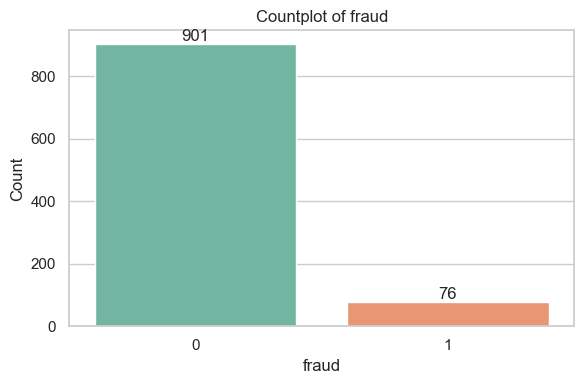


Normalized distribution (percent):


fraud
0    92.22
1     7.78
Name: proportion, dtype: float64

In [8]:
# Visualize fraud class distribution from df_clean

# auto-detect fraud column (case-insensitive substring 'fraud')
fraud_col = next((c for c in df_clean.columns if 'fraud' in c.lower()), None)
if fraud_col is None:
    raise KeyError("No column containing 'fraud' found in df_clean. Check column names: " + str(list(df_clean.columns)))

plt.figure(figsize=(6,4))
sns.countplot(x=fraud_col, data=df_clean, palette='Set2')
plt.title(f'Countplot of {fraud_col}')
plt.xlabel(fraud_col)
plt.ylabel('Count')

# annotate counts on bars
ax = plt.gca()
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# also display normalized counts (percent)
print('\nNormalized distribution (percent):')
display(df_clean[fraud_col].value_counts(normalize=True).mul(100).round(2))

**Prompt:** Visualize the used pin number distribution by making a countplot.

**AI:** ChatGPT-5 mini

/var/folders/97/k37x4v613tgc7d26967_pk_c0000gn/T/ipykernel_74564/3735939523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pin_col, data=df_clean, palette='Set3')


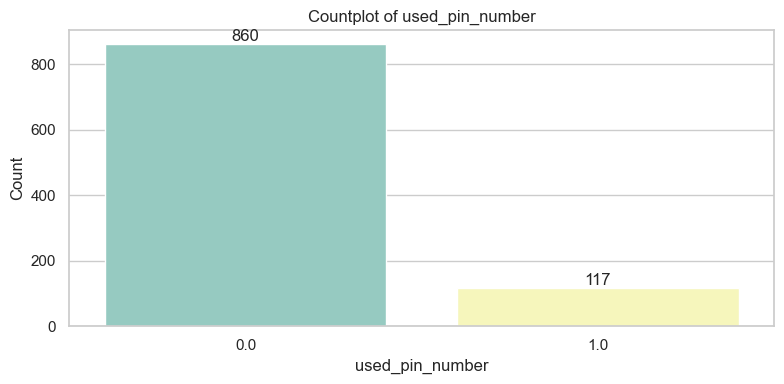


Normalized distribution (percent):


used_pin_number
0.0    88.02
1.0    11.98
Name: proportion, dtype: float64

In [9]:
# Visualize used pin number distribution from df_clean

# auto-detect column containing 'pin' (case-insensitive)
pin_col = next((c for c in df_clean.columns if 'pin' in c.lower()), None)
if pin_col is None:
    raise KeyError("No column containing 'pin' found in df_clean. Check column names: " + str(list(df_clean.columns)))

plt.figure(figsize=(8,4))
sns.countplot(x=pin_col, data=df_clean, palette='Set3')
plt.title(f'Countplot of {pin_col}')
plt.xlabel(pin_col)
plt.ylabel('Count')

# annotate counts on bars
ax = plt.gca()
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# also display normalized counts (percent)
print('\nNormalized distribution (percent):')
display(df_clean[pin_col].value_counts(normalize=True).mul(100).round(2))

**Prompt:** Visualize the repeat retailer distribution by making a countplot.

**AI:** ChatGPT-5 mini

/var/folders/97/k37x4v613tgc7d26967_pk_c0000gn/T/ipykernel_74564/1357660326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=repeat_col, data=df_clean, palette='pastel')


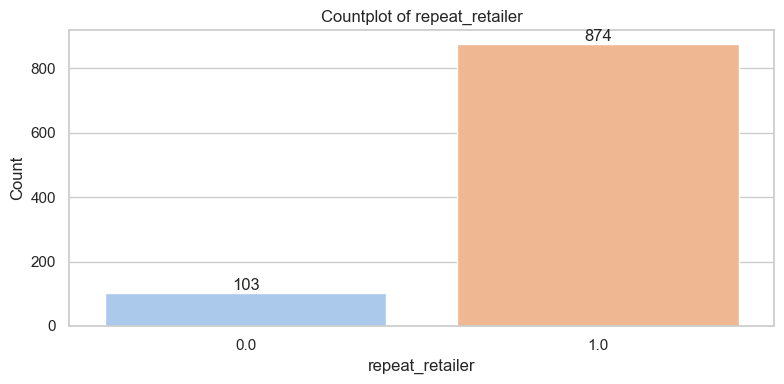


Normalized distribution (percent):


repeat_retailer
1.0    89.46
0.0    10.54
Name: proportion, dtype: float64

In [10]:
# Visualize repeat retailer distribution from df_clean

# auto-detect column containing 'repeat' or 'retailer' (case-insensitive)
repeat_col = next((c for c in df_clean.columns if 'repeat' in c.lower() or 'retailer' in c.lower()), None)
if repeat_col is None:
    raise KeyError("No column containing 'repeat' or 'retailer' found in df_clean. Check column names: " + str(list(df_clean.columns)))

plt.figure(figsize=(8,4))
sns.countplot(x=repeat_col, data=df_clean, palette='pastel')
plt.title(f'Countplot of {repeat_col}')
plt.xlabel(repeat_col)
plt.ylabel('Count')

# annotate counts on bars
ax = plt.gca()
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# display normalized counts (percent)
print("\nNormalized distribution (percent):")
display(df_clean[repeat_col].value_counts(normalize=True).mul(100).round(2))

**Prompt:** Visualize the online order distribution by making a countplot.

**AI:** ChatGPT-5 mini

/var/folders/97/k37x4v613tgc7d26967_pk_c0000gn/T/ipykernel_74564/3830863672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=online_col, data=df_clean, palette='cool')


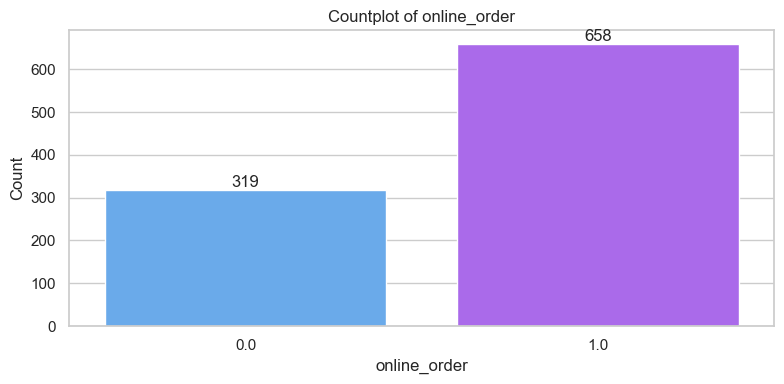


Normalized distribution (percent):


online_order
1.0    67.35
0.0    32.65
Name: proportion, dtype: float64

In [11]:
# Visualize online order distribution from df_clean

# auto-detect column containing 'online' or 'order' (case-insensitive)
online_col = next((c for c in df_clean.columns if 'online' in c.lower() or 'order' in c.lower()), None)
if online_col is None:
    raise KeyError("No column containing 'online' or 'order' found in df_clean. Check column names: " + str(list(df_clean.columns)))

plt.figure(figsize=(8,4))
sns.countplot(x=online_col, data=df_clean, palette='cool')
plt.title(f'Countplot of {online_col}')
plt.xlabel(online_col)
plt.ylabel('Count')

# annotate counts on bars
ax = plt.gca()
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# display normalized counts (percent)
print('\nNormalized distribution (percent):')
display(df_clean[online_col].value_counts(normalize=True).mul(100).round(2))

**Prompt:** Visualize the distribution of the `ratio_to_median_purchase_price` by making a histogram with 30 bins. 

**AI:** ChatGPT-5 mini

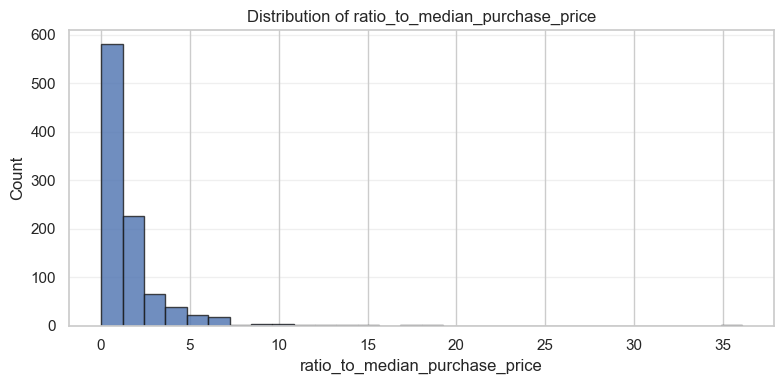

In [12]:
# Histogram of ratio_to_median_purchase_price (30 bins)
col = 'ratio_to_median_purchase_price'
if col not in df_clean.columns:
    raise KeyError(f"Column '{col}' not found in df_clean. Available columns: {list(df_clean.columns)}")

vals = pd.to_numeric(df_clean[col], errors='coerce').dropna()
if vals.empty:
    raise ValueError(f"Column '{col}' contains no numeric values after conversion.")

plt.figure(figsize=(8,4))
plt.hist(vals, bins=30, color='C0', edgecolor='k', alpha=0.8)
plt.title('Distribution of ratio_to_median_purchase_price')
plt.xlabel('ratio_to_median_purchase_price')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Prompt:** Visualize the distribution of the `distance_from_home` by making a histogram with 30 bins.  

**AI:** ChatGPT-5 mini

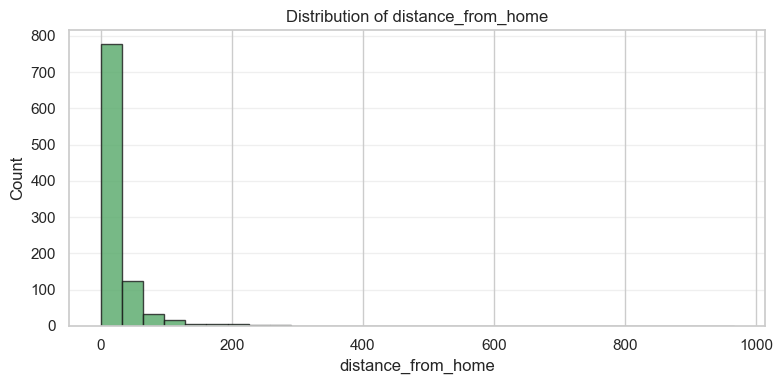

In [13]:
# Histogram of distance_from_home (30 bins)
col = 'distance_from_home'
if col not in df_clean.columns:
    raise KeyError(f"Column '{col}' not found in df_clean. Available columns: {list(df_clean.columns)}")

vals = pd.to_numeric(df_clean[col], errors='coerce').dropna()
if vals.empty:
    raise ValueError(f"Column '{col}' contains no numeric values after conversion.")

plt.figure(figsize=(8,4))
plt.hist(vals, bins=30, color='C2', edgecolor='k', alpha=0.8)
plt.title('Distribution of distance_from_home')
plt.xlabel('distance_from_home')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Bivariate Visualizations

**Prompt:** Generate a bivariate visualization by making a countplot of `used_pin_number` with a hue of `fraud`.  

**AI:** ChatGPT-5 mini

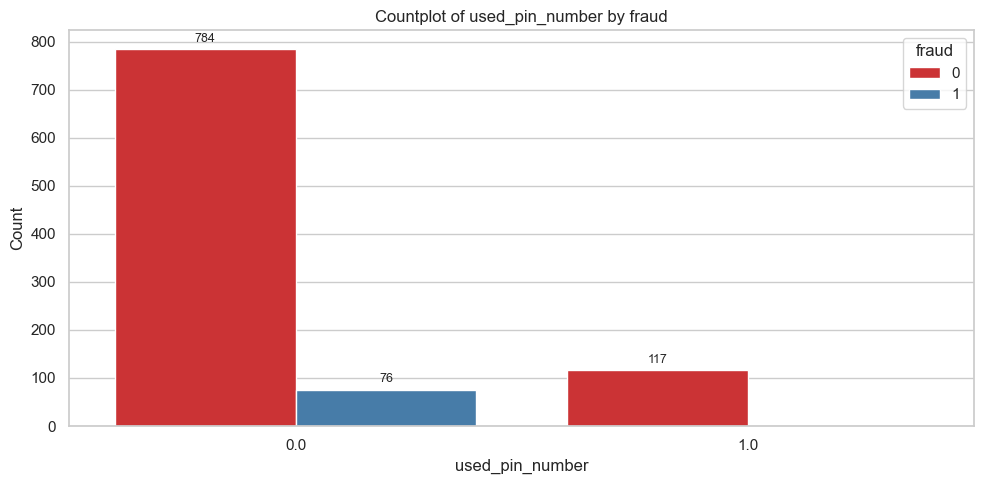


Normalized distribution (percent) by fraud class:


fraud,0,1
used_pin_number,,
0.0,91.16,8.84
1.0,100.00,0.00


In [14]:
# Bivariate countplot: used_pin_number (x) with hue=fraud

# auto-detect used-pin and fraud columns (case-insensitive)
used_pin_col = next((c for c in df_clean.columns if 'used_pin' in c.lower() or 'usedpin' in c.lower() or 'used_pin_number' in c.lower() or 'pin'==c.lower()), None)
fraud_col = next((c for c in df_clean.columns if 'fraud' in c.lower()), None)
if used_pin_col is None or fraud_col is None:
    raise KeyError("Required columns not found. Available columns: " + str(list(df_clean.columns)))

plt.figure(figsize=(10,5))
ax = sns.countplot(x=used_pin_col, hue=fraud_col, data=df_clean, palette='Set1')
plt.title(f'Countplot of {used_pin_col} by {fraud_col}')
plt.xlabel(used_pin_col)
plt.ylabel('Count')

# rotate x labels if many categories
if len(df_clean[used_pin_col].unique()) > 8:
    plt.xticks(rotation=45, ha='right')

# annotate counts on each bar (handles hue bars)
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')

plt.tight_layout()
plt.show()

# show normalized distribution table
print('\nNormalized distribution (percent) by fraud class:')
display(pd.crosstab(df_clean[used_pin_col], df_clean[fraud_col], normalize='index').mul(100).round(2))

**Prompt:** Make a bar chart of the percentage of fraudulant transactions when a PIN was used or not. Stack the Fraudulant and Non Fraudulant so that each bar adds up to 100%, separate Fraudulant and Non Fraudulant by hue.

**AI:** ChatGPT-5 mini

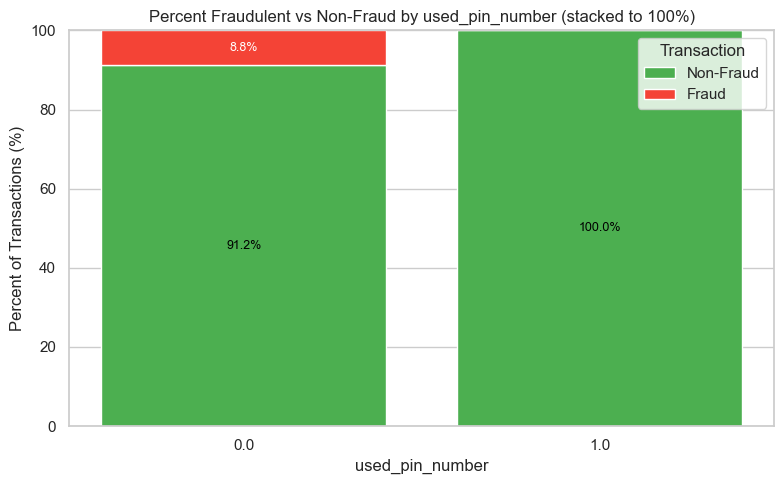

fraud_flag,used_pin_number,Non-Fraud,Fraud,Total,Non-Fraud (%),Fraud (%)
0,0.0,784,76,860,91.16,8.84
1,1.0,117,0,117,100.00,0.00


In [15]:
# Stacked 100% bar chart: percent Fraud vs Non-Fraud when a PIN was used or not

# auto-detect pin and fraud columns
pin_col = next((c for c in df_clean.columns if 'pin' in c.lower()), None)
fraud_col = next((c for c in df_clean.columns if 'fraud' in c.lower()), None)
if pin_col is None or fraud_col is None:
    raise KeyError("Required columns not found. Available columns: " + str(list(df_clean.columns)))

# robust fraud flag (numeric or string)
num = pd.to_numeric(df_clean[fraud_col], errors='coerce')
if num.notna().sum() > 0:
    fraud_flag = (num == 1)
else:
    s = df_clean[fraud_col].astype(str).str.lower().str.strip()
    fraud_flag = s.isin(['1','true','t','y','yes','fraud','fraudulent'])

# prepare crosstab and normalize rows to percent
tmp = pd.DataFrame({pin_col: df_clean[pin_col], 'fraud_flag': fraud_flag})
counts = pd.crosstab(tmp[pin_col], tmp['fraud_flag']).rename(columns={False: 'Non-Fraud', True: 'Fraud'})
if 'Fraud' not in counts.columns:
    counts['Fraud'] = 0
if 'Non-Fraud' not in counts.columns:
    counts['Non-Fraud'] = 0
pct = counts.div(counts.sum(axis=1), axis=0).mul(100).round(2)

# order columns for consistent stacking: Non-Fraud bottom, Fraud top
cols = ['Non-Fraud', 'Fraud']
pct = pct[cols]

# plot stacked bars
plt.figure(figsize=(8,5))
bottom = None
colors = ['#4CAF50', '#F44336']
labels = pct.index.astype(str)
for i, col in enumerate(cols):
    vals = pct[col].values
    if bottom is None:
        p = plt.bar(labels, vals, color=colors[i], label=col)
        bottom = vals.copy()
    else:
        p = plt.bar(labels, vals, bottom=bottom, color=colors[i], label=col)
        bottom = bottom + vals

plt.ylabel('Percent of Transactions (%)')
plt.xlabel(pin_col)
plt.title(f'Percent Fraudulent vs Non-Fraud by {pin_col} (stacked to 100%)')
plt.ylim(0, 100)
plt.legend(title='Transaction')

# annotate percent labels in each segment where space permits
for i, label in enumerate(labels):
    cum = 0
    for j, col in enumerate(cols):
        val = pct.iloc[i][col]
        if val > 0.5:  # only annotate if segment is reasonably large
            plt.text(i, cum + val/2, f"{val:.1f}%", ha='center', va='center', color='white' if j==1 else 'black', fontsize=9)
        cum += val

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# display counts and percent summary
summary = counts.copy()
summary['Total'] = summary.sum(axis=1)
summary = summary.join(pct.add_suffix(' (%)'))
display(summary.reset_index().rename(columns={0: pin_col}))

**Prompt:** Make a countplot of the number of individuals who used a chip or not. Also separate fraudulant and non fraudulant transactions and color red and green.  
Make a bar chart of the percentage of fraudulant transactions when a chip was used or not. Stack the fraudulant and non fraudulant so that each bar adds up to 100%, separate fraudulant and non fraudulant by hue.    

**AI:** ChatGPT-5 mini

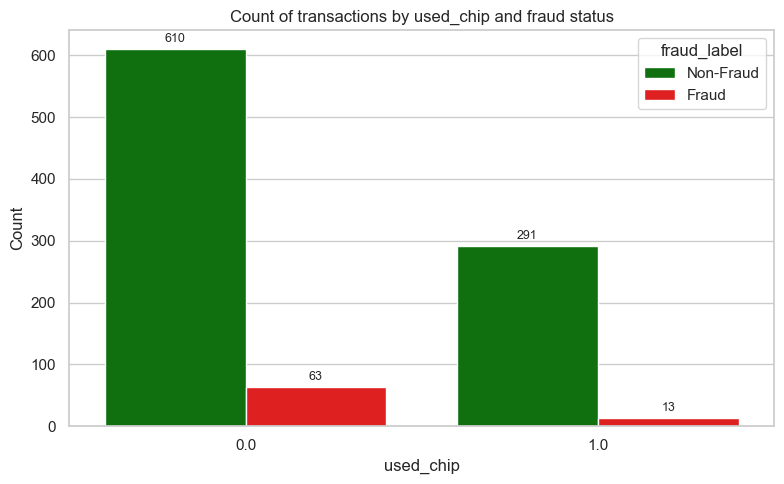

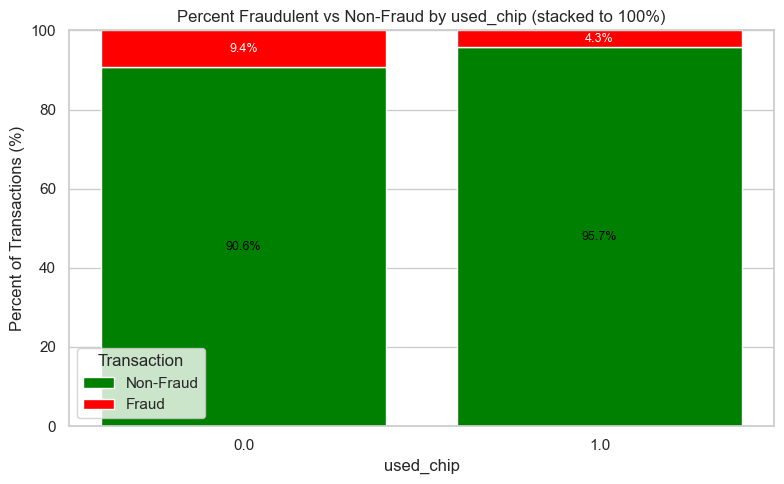

fraud_flag,used_chip,Non-Fraud,Fraud,Total,Non-Fraud (%),Fraud (%)
0,0.0,610,63,673,90.64,9.36
1,1.0,291,13,304,95.72,4.28


In [16]:
# Countplot and stacked 100% bar chart for chip usage vs fraud

# auto-detect chip and fraud columns (case-insensitive)
chip_col = next((c for c in df_clean.columns if 'chip' in c.lower()), None)
fraud_col = next((c for c in df_clean.columns if 'fraud' in c.lower()), None)
if chip_col is None or fraud_col is None:
    raise KeyError("Required columns not found. Available columns: " + str(list(df_clean.columns)))

# robust fraud flag (numeric or string) and label
num = pd.to_numeric(df_clean[fraud_col], errors='coerce')
if num.notna().sum() > 0:
    fraud_flag = (num == 1)
else:
    s = df_clean[fraud_col].astype(str).str.lower().str.strip()
    fraud_flag = s.isin(['1','true','t','y','yes','fraud','fraudulent'])

df_plot = df_clean.copy()
df_plot['fraud_label'] = np.where(fraud_flag, 'Fraud', 'Non-Fraud')

# 1) Countplot: chip usage by fraud status (green=Non-Fraud, red=Fraud)
plt.figure(figsize=(8,5))
ax = sns.countplot(x=chip_col, hue='fraud_label', data=df_plot, palette={'Non-Fraud':'green','Fraud':'red'})
plt.title(f'Count of transactions by {chip_col} and fraud status')
plt.xlabel(chip_col)
plt.ylabel('Count')
if len(df_plot[chip_col].unique()) > 8:
    plt.xticks(rotation=45, ha='right')
# annotate counts
for p in ax.patches:
    h = int(p.get_height())
    if h > 0:
        ax.annotate(f'{h}', (p.get_x()+p.get_width()/2., h), ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()

# 2) Stacked 100% bar chart: percent Fraud vs Non-Fraud when chip used or not
tmp = pd.DataFrame({chip_col: df_clean[chip_col], 'fraud_flag': fraud_flag})
counts = pd.crosstab(tmp[chip_col], tmp['fraud_flag']).rename(columns={False: 'Non-Fraud', True: 'Fraud'})
if 'Fraud' not in counts.columns:
    counts['Fraud'] = 0
if 'Non-Fraud' not in counts.columns:
    counts['Non-Fraud'] = 0
pct = counts.div(counts.sum(axis=1), axis=0).mul(100).round(2)
cols = ['Non-Fraud', 'Fraud']
pct = pct[cols]
labels = pct.index.astype(str)

plt.figure(figsize=(8,5))
bottom = None
colors = ['green', 'red']
for i, col in enumerate(cols):
    vals = pct[col].values
    if bottom is None:
        plt.bar(labels, vals, color=colors[i], label=col)
        bottom = vals.copy()
    else:
        plt.bar(labels, vals, bottom=bottom, color=colors[i], label=col)
        bottom = bottom + vals

plt.ylabel('Percent of Transactions (%)')
plt.xlabel(chip_col)
plt.title(f'Percent Fraudulent vs Non-Fraud by {chip_col} (stacked to 100%)')
plt.ylim(0, 100)
plt.legend(title='Transaction')
# annotate percent values inside segments where space permits
for i, label in enumerate(labels):
    cum = 0
    for col in cols:
        val = pct.iloc[i][col]
        if val > 0.5:
            plt.text(i, cum + val/2, f'{val:.1f}%', ha='center', va='center', color='white' if col == 'Fraud' else 'black', fontsize=9)
        cum += val
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# summary: show counts and percent
summary = counts.copy()
summary['Total'] = summary.sum(axis=1)
summary = summary.join(pct.add_suffix(' (%)'))
display(summary.reset_index().rename(columns={0: chip_col}))

**Prompt:** Can you create the same two charts with number of transactions that were fraudulant vs non fraudulant when it was an online order or not?    

**AI:** ChatGPT-5 mini

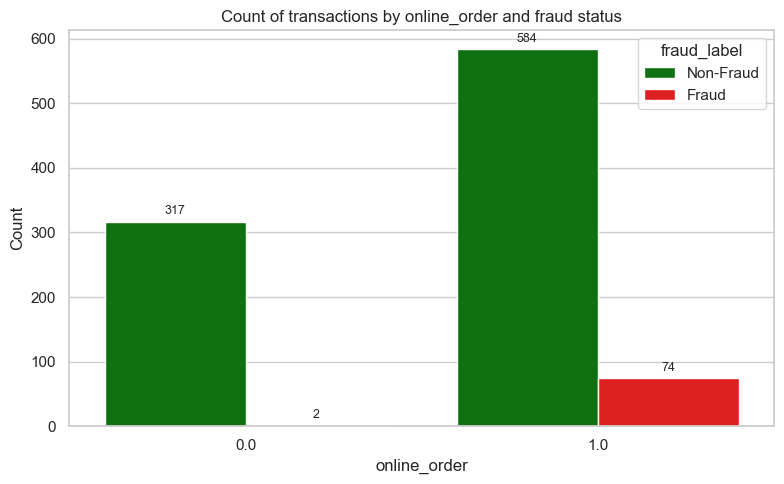

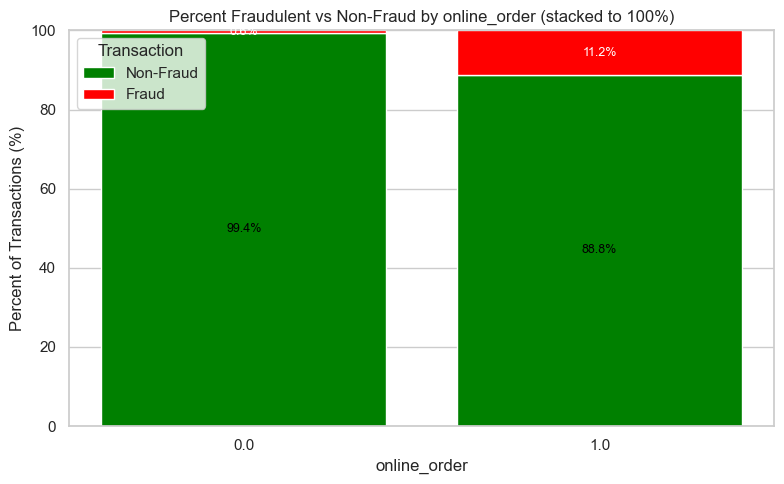

fraud_flag,online_order,Non-Fraud,Fraud,Total,Non-Fraud (%),Fraud (%)
0,0.0,317,2,319,99.37,0.63
1,1.0,584,74,658,88.75,11.25


In [17]:
# Countplot and stacked 100% bar chart for online order vs fraud

# auto-detect online/order and fraud columns (case-insensitive)
online_col = next((c for c in df_clean.columns if 'online' in c.lower() or 'order' in c.lower()), None)
fraud_col = next((c for c in df_clean.columns if 'fraud' in c.lower()), None)
if online_col is None or fraud_col is None:
    raise KeyError("Required columns not found. Available columns: " + str(list(df_clean.columns)))

# robust fraud flag (numeric or string) and label
num = pd.to_numeric(df_clean[fraud_col], errors='coerce')
if num.notna().sum() > 0:
    fraud_flag = (num == 1)
else:
    s = df_clean[fraud_col].astype(str).str.lower().str.strip()
    fraud_flag = s.isin(['1','true','t','y','yes','fraud','fraudulent'])

df_plot = df_clean.copy()
df_plot['fraud_label'] = np.where(fraud_flag, 'Fraud', 'Non-Fraud')

# 1) Countplot: online order by fraud status (green=Non-Fraud, red=Fraud)
plt.figure(figsize=(8,5))
ax = sns.countplot(x=online_col, hue='fraud_label', data=df_plot, palette={'Non-Fraud':'green','Fraud':'red'})
plt.title(f'Count of transactions by {online_col} and fraud status')
plt.xlabel(online_col)
plt.ylabel('Count')
if len(df_plot[online_col].unique()) > 8:
    plt.xticks(rotation=45, ha='right')
# annotate counts
for p in ax.patches:
    h = int(p.get_height())
    if h > 0:
        ax.annotate(f'{h}', (p.get_x()+p.get_width()/2., h), ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()

# 2) Stacked 100% bar chart: percent Fraud vs Non-Fraud when online order or not
tmp = pd.DataFrame({online_col: df_clean[online_col], 'fraud_flag': fraud_flag})
counts = pd.crosstab(tmp[online_col], tmp['fraud_flag']).rename(columns={False: 'Non-Fraud', True: 'Fraud'})
if 'Fraud' not in counts.columns:
    counts['Fraud'] = 0
if 'Non-Fraud' not in counts.columns:
    counts['Non-Fraud'] = 0
pct = counts.div(counts.sum(axis=1), axis=0).mul(100).round(2)
cols = ['Non-Fraud', 'Fraud']
pct = pct[cols]
labels = pct.index.astype(str)

plt.figure(figsize=(8,5))
bottom = None
colors = ['green', 'red']
for i, col in enumerate(cols):
    vals = pct[col].values
    if bottom is None:
        plt.bar(labels, vals, color=colors[i], label=col)
        bottom = vals.copy()
    else:
        plt.bar(labels, vals, bottom=bottom, color=colors[i], label=col)
        bottom = bottom + vals

plt.ylabel('Percent of Transactions (%)')
plt.xlabel(online_col)
plt.title(f'Percent Fraudulent vs Non-Fraud by {online_col} (stacked to 100%)')
plt.ylim(0, 100)
plt.legend(title='Transaction')
# annotate percent values inside segments where space permits
for i, label in enumerate(labels):
    cum = 0
    for col in cols:
        val = pct.iloc[i][col]
        if val > 0.5:
            plt.text(i, cum + val/2, f'{val:.1f}%', ha='center', va='center', color='white' if col == 'Fraud' else 'black', fontsize=9)
        cum += val
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# summary: show counts and percent
summary = counts.copy()
summary['Total'] = summary.sum(axis=1)
summary = summary.join(pct.add_suffix(' (%)'))
display(summary.reset_index().rename(columns={0: online_col}))

**Prompt:** Make a scatterplot showing the showing the breakdown of the fraudulant and non fraudulant transactions for the `distance_from_last_transaction` and `ratio_to_median_purchase_price`.    

**AI:** ChatGPT-5 mini

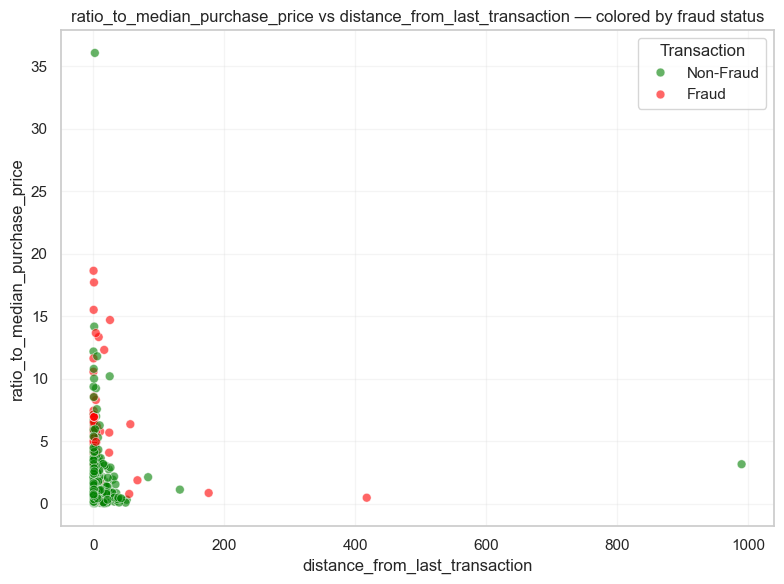


Counts by fraud label:


fraud_label
Non-Fraud    901
Fraud         76
Name: count, dtype: int64


Sample of plotted data:


,distance_from_last_transaction,ratio_to_median_purchase_price,fraud_flag,fraud_label
932,0.367448,0.260833,False,Non-Fraud
724,0.923814,1.221863,False,Non-Fraud
525,0.106360,0.580695,False,Non-Fraud
6,2.503609,1.516999,False,Non-Fraud
248,0.513049,5.337626,True,Fraud
331,5.027139,1.704773,False,Non-Fraud
672,0.688586,6.928813,True,Fraud
148,0.655260,5.433500,True,Fraud
972,1.326847,2.583335,False,Non-Fraud
159,0.386174,0.935690,False,Non-Fraud


In [18]:
# Scatterplot: distance_from_last_transaction vs ratio_to_median_purchase_price colored by fraud

# auto-detect columns
x_col = 'distance_from_last_transaction'
y_col = 'ratio_to_median_purchase_price'
fraud_col = next((c for c in df_clean.columns if 'fraud' in c.lower()), None)

for c in (x_col, y_col):
    if c not in df_clean.columns:
        raise KeyError(f"Column '{c}' not found in df_clean. Available columns: {list(df_clean.columns)}")
if fraud_col is None:
    raise KeyError("No column containing 'fraud' found in df_clean. Check column names: " + str(list(df_clean.columns)))

# robust fraud flag (numeric or string)
num = pd.to_numeric(df_clean[fraud_col], errors='coerce')
if num.notna().sum() > 0:
    fraud_flag = (num == 1)
else:
    s = df_clean[fraud_col].astype(str).str.lower().str.strip()
    fraud_flag = s.isin(['1','true','t','y','yes','fraud','fraudulent'])

# prepare plotting DataFrame and convert x/y to numeric
plot_df = df_clean[[x_col, y_col]].copy()
plot_df['fraud_flag'] = fraud_flag
plot_df[x_col] = pd.to_numeric(plot_df[x_col], errors='coerce')
plot_df[y_col] = pd.to_numeric(plot_df[y_col], errors='coerce')
plot_df = plot_df.dropna(subset=[x_col, y_col])

if plot_df.empty:
    raise ValueError('No valid numeric rows to plot after conversion and dropping NA.')

# add human-readable label
plot_df['fraud_label'] = np.where(plot_df['fraud_flag'], 'Fraud', 'Non-Fraud')

# scatterplot
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=plot_df, x=x_col, y=y_col, hue='fraud_label',
                     palette={'Non-Fraud':'green','Fraud':'red'}, alpha=0.6, s=40)
plt.title(f'{y_col} vs {x_col} — colored by fraud status')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(title='Transaction', loc='best')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# display counts and a small sample
print('\nCounts by fraud label:')
display(plot_df['fraud_label'].value_counts())

print('\nSample of plotted data:')
display(plot_df.sample(min(10, len(plot_df)), random_state=1))

**Prompt:** Make the same scatterplot as the last one but change the `distance_from_last_transaction` to `distance_from_home`.    

**AI:** ChatGPT-5 mini

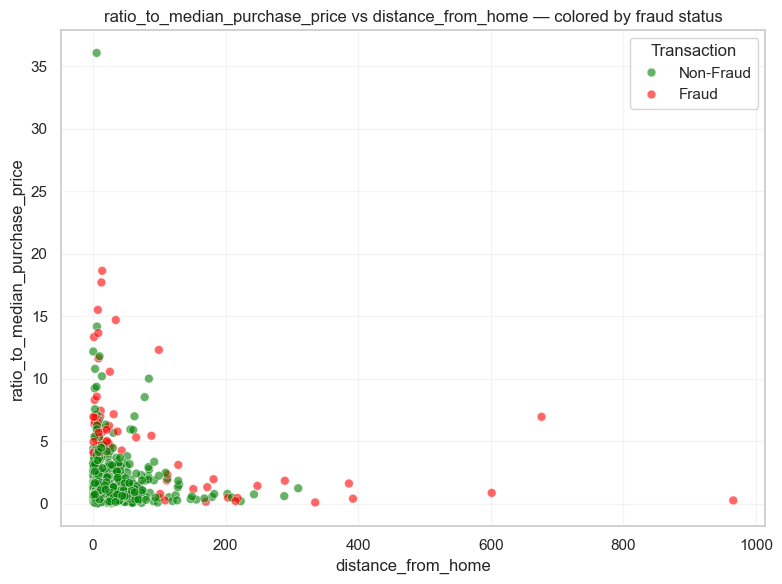


Counts by fraud label:


fraud_label
Non-Fraud    901
Fraud         76
Name: count, dtype: int64


Sample of plotted data:


,distance_from_home,ratio_to_median_purchase_price,fraud_flag,fraud_label
932,39.904167,0.260833,False,Non-Fraud
724,7.502777,1.221863,False,Non-Fraud
525,30.307301,0.580695,False,Non-Fraud
6,0.876632,1.516999,False,Non-Fraud
248,7.888323,5.337626,True,Fraud
331,13.370497,1.704773,False,Non-Fraud
672,2.765789,6.928813,True,Fraud
148,88.158919,5.433500,True,Fraud
972,3.005300,2.583335,False,Non-Fraud
159,3.448570,0.935690,False,Non-Fraud


In [19]:
# Scatterplot: distance_from_home vs ratio_to_median_purchase_price colored by fraud

# columns to use
x_col = 'distance_from_home'
y_col = 'ratio_to_median_purchase_price'
fraud_col = next((c for c in df_clean.columns if 'fraud' in c.lower()), None)

for c in (x_col, y_col):
    if c not in df_clean.columns:
        raise KeyError(f"Column '{c}' not found in df_clean. Available columns: {list(df_clean.columns)}")
if fraud_col is None:
    raise KeyError("No column containing 'fraud' found in df_clean. Check column names: " + str(list(df_clean.columns)))

# robust fraud flag (numeric or string)
num = pd.to_numeric(df_clean[fraud_col], errors='coerce')
if num.notna().sum() > 0:
    fraud_flag = (num == 1)
else:
    s = df_clean[fraud_col].astype(str).str.lower().str.strip()
    fraud_flag = s.isin(['1','true','t','y','yes','fraud','fraudulent'])

# prepare plotting DataFrame and convert x/y to numeric
plot_df = df_clean[[x_col, y_col]].copy()
plot_df['fraud_flag'] = fraud_flag
plot_df[x_col] = pd.to_numeric(plot_df[x_col], errors='coerce')
plot_df[y_col] = pd.to_numeric(plot_df[y_col], errors='coerce')
plot_df = plot_df.dropna(subset=[x_col, y_col])

if plot_df.empty:
    raise ValueError('No valid numeric rows to plot after conversion and dropping NA.')

# add human-readable label
plot_df['fraud_label'] = np.where(plot_df['fraud_flag'], 'Fraud', 'Non-Fraud')

# scatterplot
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=plot_df, x=x_col, y=y_col, hue='fraud_label',
                     palette={'Non-Fraud':'green','Fraud':'red'}, alpha=0.6, s=40)
plt.title(f'{y_col} vs {x_col} — colored by fraud status')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(title='Transaction', loc='best')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# display counts and a small sample
print('\nCounts by fraud label:')
display(plot_df['fraud_label'].value_counts())

print('\nSample of plotted data:')
display(plot_df.sample(min(10, len(plot_df)), random_state=1))